In [5]:
import pandas as pd 
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats 
import statsmodels.api as sm

In [3]:
df = pd.read_csv('2011_2013data.csv')

In [4]:
df.head()

VALUE2013  LN(VALUE2013)  AGE1  CENTRAL CITY  Northeast  Midwest  South  \
0     280000      12.542545    62             0          1        0      0   
1     180000      12.100712    33             1          0        0      1   
2     750000      13.527828    62             0          0        0      0   
3     600000      13.304685    72             0          0        0      0   
4     190000      12.154779    49             1          0        0      0   

    LN(LMED)   LN(FMR)  PER  LN(ZINC2>1000)  ADEQUATE  BEDRMS  BUILT  ROOMS  \
0  11.294769  7.370860    3       11.609943         1       4   1940      8   
1  11.154821  7.184629    4       11.599030         1       3   1930      7   
2  11.066638  7.584265    2       11.567309         1       3   1940      6   
3  11.066638  7.584265    1       10.173515         1       3   1950      6   
4  11.162446  6.704414    1       10.714018         1       2   1940      6   

   LN(UTILITY>0)  LN(OTHERCOST>0)  LN(VALUE2011)  
0       5.908988         4.135167      12.524526  
1       5.749393         4.605170      12.154779  
2       5.253581         3.912023      13.527828  
3       5.480639         4.828314      13.122363  
4       4.983607         3.825012      12.301383

In [5]:
df.columns

Index(['VALUE2013', 'LN(VALUE2013)', 'AGE1', 'CENTRAL CITY', 'Northeast',
       'Midwest', 'South', 'LN(LMED)', 'LN(FMR)', 'PER', 'LN(ZINC2>1000)',
       'ADEQUATE', 'BEDRMS', 'BUILT', 'ROOMS', 'LN(UTILITY>0)',
       'LN(OTHERCOST>0)', 'LN(VALUE2011)'],
      dtype='object')

count    1.973000e+04
mean     2.503365e+05
std      2.681413e+05
min      1.000000e+04
25%      1.100000e+05
50%      1.800000e+05
75%      3.000000e+05
max      2.520000e+06
Name: VALUE2013, dtype: float64

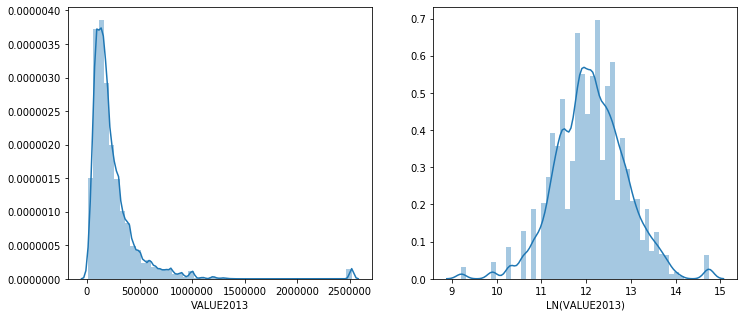

In [37]:
# statistics and distribution
# Market Value transformation 
fig, axes = plt.subplots(1,2,figsize=(12, 5))
sns.distplot(df['VALUE2013'], ax = axes[0])
sns.distplot(df['LN(VALUE2013)'], ax = axes[1])
df['VALUE2013'].describe()

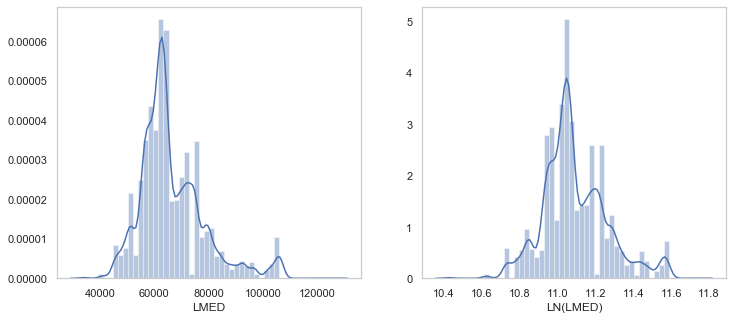

In [242]:
# Area Median Income
df['LMED'] = np.exp(df['LN(LMED)'])
fig,axes = plt.subplots(1,2,figsize=(12,5))
sns.distplot(df['LMED'], ax = axes[0])
sns.distplot(df['LN(LMED)'], ax = axes[1])

count    19730.000000
mean        55.224531
std         15.449678
min         17.000000
25%         44.000000
50%         55.000000
75%         66.000000
max         93.000000
Name: AGE1, dtype: float64

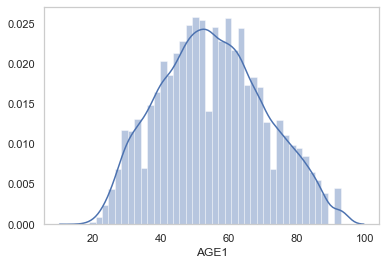

In [241]:
sns.distplot(df['AGE1'],bins = 40)
df['AGE1'].describe()

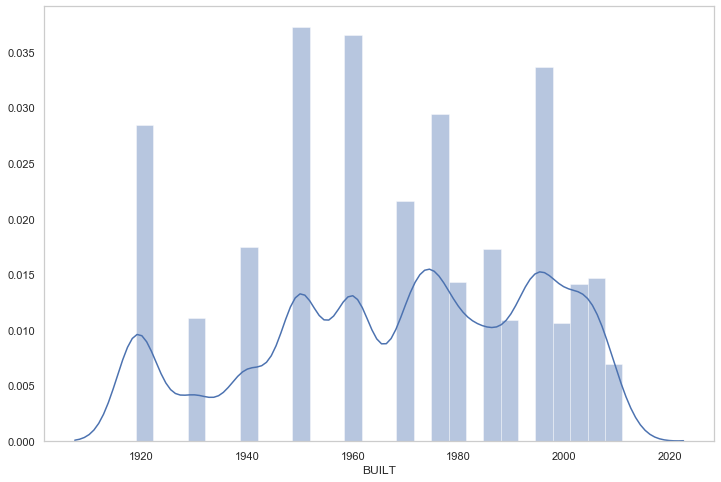

count    19730.000000
mean      1968.953979
std         26.330337
min       1919.000000
25%       1950.000000
50%       1970.000000
75%       1995.000000
max       2011.000000
Name: BUILT, dtype: float64

In [240]:
plt.figure(figsize = (12,8))
sns.distplot(df['BUILT'])
plt.show()
df['BUILT'].describe()

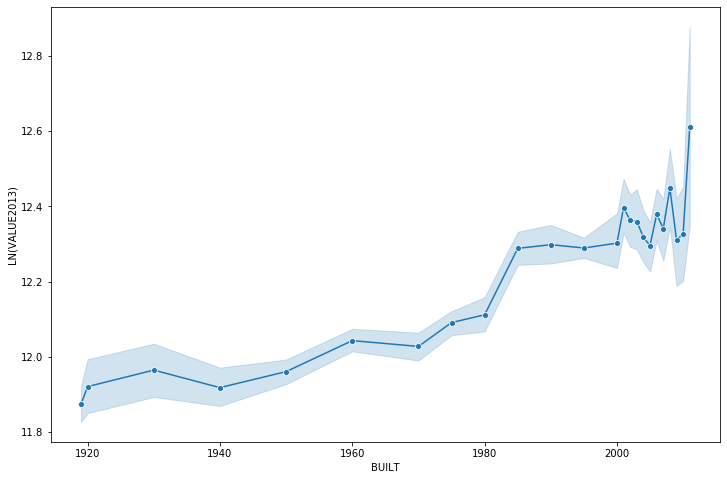

In [36]:
plt.figure(figsize = (12,8))
sns.lineplot(x = 'BUILT',y = 'LN(VALUE2013)',data = df,marker = 'o')

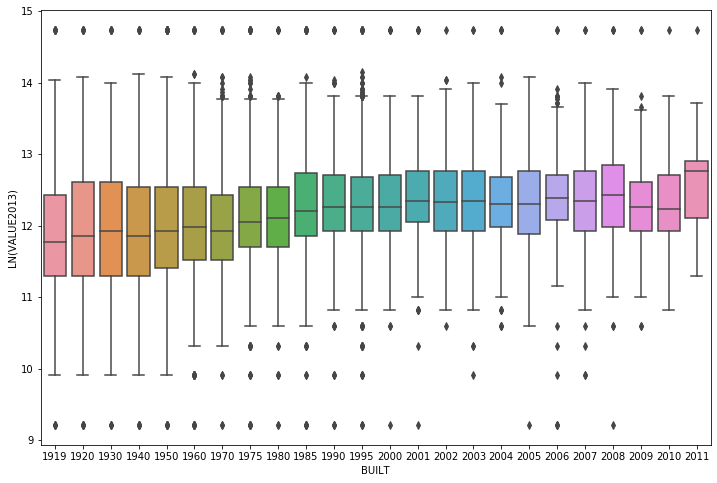

In [105]:
plt.figure(figsize = (12,8))
sns.boxplot(x = 'BUILT', y = 'LN(VALUE2013)',data = df)

In [139]:
corr_drop = df.drop(['VALUE2013', 'LN(VALUE2013)'],axis = 1)
corr_keep = corr_drop.corr()
corr_keep

AGE1  CENTRAL CITY  Northeast   Midwest     South  \
AGE1             1.000000     -0.024023   0.019721 -0.019626  0.008212   
CENTRAL CITY    -0.024023      1.000000  -0.069143 -0.015182 -0.011332   
Northeast        0.019721     -0.069143   1.000000 -0.278131 -0.344539   
Midwest         -0.019626     -0.015182  -0.278131  1.000000 -0.457808   
South            0.008212     -0.011332  -0.344539 -0.457808  1.000000   
LN(LMED)        -0.028841      0.067398   0.391062 -0.098140 -0.341382   
LN(FMR)         -0.053384      0.088907   0.205234 -0.413501 -0.129521   
PER             -0.415307      0.004693   0.026705 -0.020037 -0.040046   
LN(ZINC2>1000)  -0.322056     -0.024002   0.053261 -0.033699 -0.060541   
ADEQUATE        -0.019508     -0.006093  -0.012441  0.030228 -0.040871   
BEDRMS          -0.112563     -0.020127  -0.006071 -0.043408  0.008774   
BUILT           -0.147277     -0.121215  -0.194654 -0.109546  0.196400   
ROOMS           -0.059398     -0.029075   0.037942 -0.018251 -0.016270   
LN(UTILITY>0)   -0.089385      0.047247   0.204600 -0.178245  0.053306   
LN(OTHERCOST>0)  0.010267     -0.012636   0.008480 -0.144367  0.073433   
LN(VALUE2011)   -0.012806     -0.027588   0.149641 -0.217399 -0.125389   

                 LN(LMED)   LN(FMR)       PER  LN(ZINC2>1000)  ADEQUATE  \
AGE1            -0.028841 -0.053384 -0.415307       -0.322056 -0.019508   
CENTRAL CITY     0.067398  0.088907  0.004693       -0.024002 -0.006093   
Northeast        0.391062  0.205234  0.026705        0.053261 -0.012441   
Midwest         -0.098140 -0.413501 -0.020037       -0.033699  0.030228   
South           -0.341382 -0.129521 -0.040046       -0.060541 -0.040871   
LN(LMED)         1.000000  0.664177  0.083104        0.181910  0.038380   
LN(FMR)          0.664177  1.000000  0.221157        0.247345  0.047238   
PER              0.083104  0.221157  1.000000        0.310250  0.006811   
LN(ZINC2>1000)   0.181910  0.247345  0.310250        1.000000  0.075264   
ADEQUATE         0.038380  0.047238  0.006811        0.075264  1.000000   
BEDRMS           0.102484  0.470650  0.335301        0.266526  0.055011   
BUILT           -0.117197  0.045832  0.099828        0.168164  0.080649   
ROOMS            0.140614  0.347185  0.260311        0.336491  0.051938   
LN(UTILITY>0)    0.175047  0.294892  0.318806        0.257501  0.014388   
LN(OTHERCOST>0)  0.138835  0.283904  0.059229        0.243772  0.055130   
LN(VALUE2011)    0.386027  0.538807  0.133736        0.404100  0.097645   

                   BEDRMS     BUILT     ROOMS  LN(UTILITY>0)  LN(OTHERCOST>0)  \
AGE1            -0.112563 -0.147277 -0.059398      -0.089385         0.010267   
CENTRAL CITY    -0.020127 -0.121215 -0.029075       0.047247        -0.012636   
Northeast       -0.006071 -0.194654  0.037942       0.204600         0.008480   
Midwest         -0.043408 -0.109546 -0.018251      -0.178245        -0.144367   
South            0.008774  0.196400 -0.016270       0.053306         0.073433   
LN(LMED)         0.102484 -0.117197  0.140614       0.175047         0.138835   
LN(FMR)          0.470650  0.045832  0.347185       0.294892         0.283904   
PER              0.335301  0.099828  0.260311       0.318806         0.059229   
LN(ZINC2>1000)   0.266526  0.168164  0.336491       0.257501         0.243772   
ADEQUATE         0.055011  0.080649  0.051938       0.014388         0.055130   
BEDRMS           1.000000  0.153492  0.740240       0.333709         0.186501   
BUILT            0.153492  1.000000  0.133311       0.001058         0.204772   
ROOMS            0.740240  0.133311  1.000000       0.381636         0.246146   
LN(UTILITY>0)    0.333709  0.001058  0.381636       1.000000         0.188102   
LN(OTHERCOST>0)  0.186501  0.204772  0.246146       0.188102         1.000000   
LN(VALUE2011)    0.347098  0.196058  0.419357       0.278469         0.478311   

                 LN(VALUE2011)  
AGE1                 -0.012806  
CENTRAL CITY         -0.027588  
Northeast

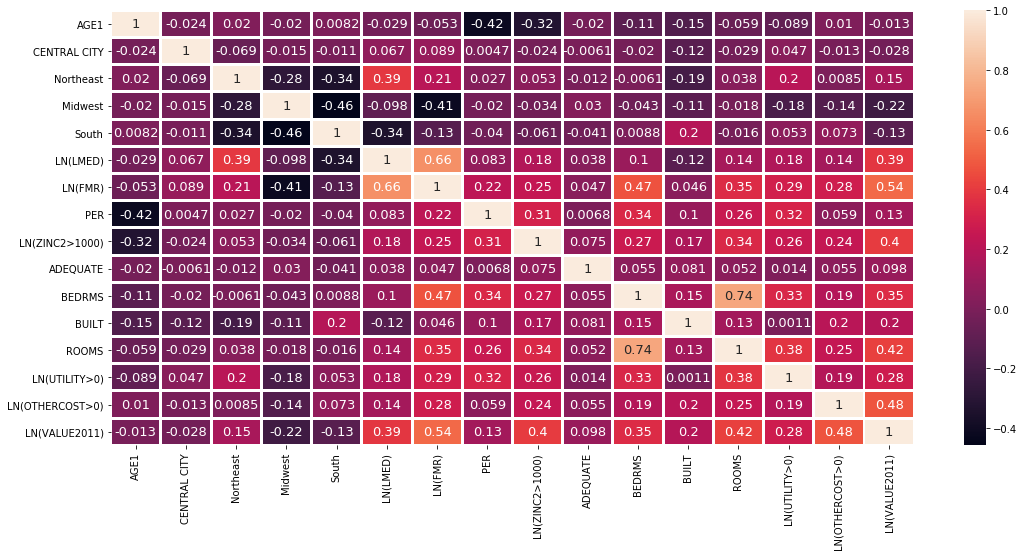

In [142]:
f, ax = plt.subplots(figsize=(18, 8))
sns.heatmap(corr_keep,vmax = 1, annot_kws={"size": 13},annot=True,linewidths=2, xticklabels=1)

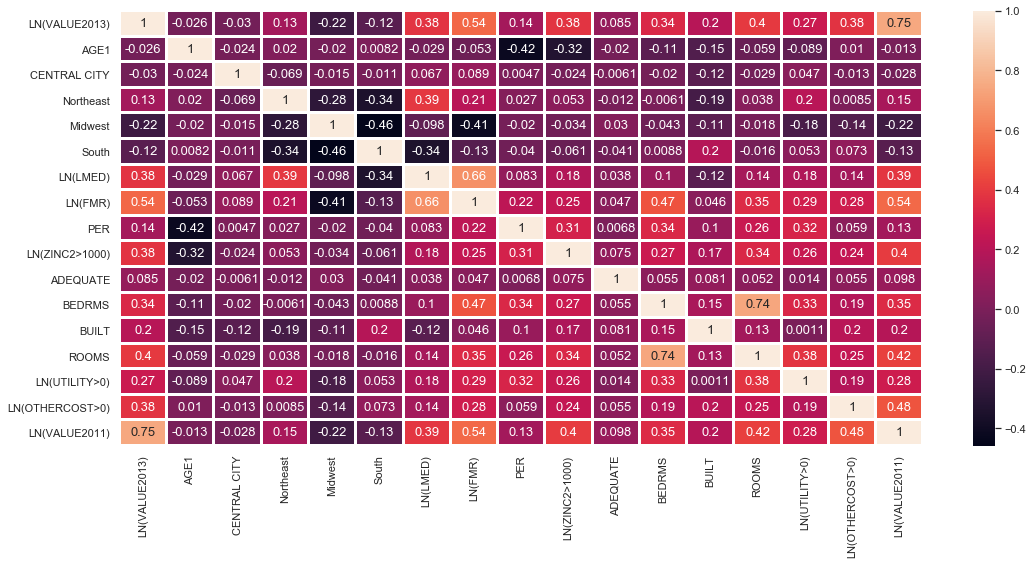

In [172]:
corrmat = df.drop(['VALUE2013','LMED'],axis = 1).corr()
f, ax = plt.subplots(figsize=(18, 8))
sns.heatmap(corrmat,vmax = 1, annot_kws={"size": 13},annot=True,linewidths=2, xticklabels=1)

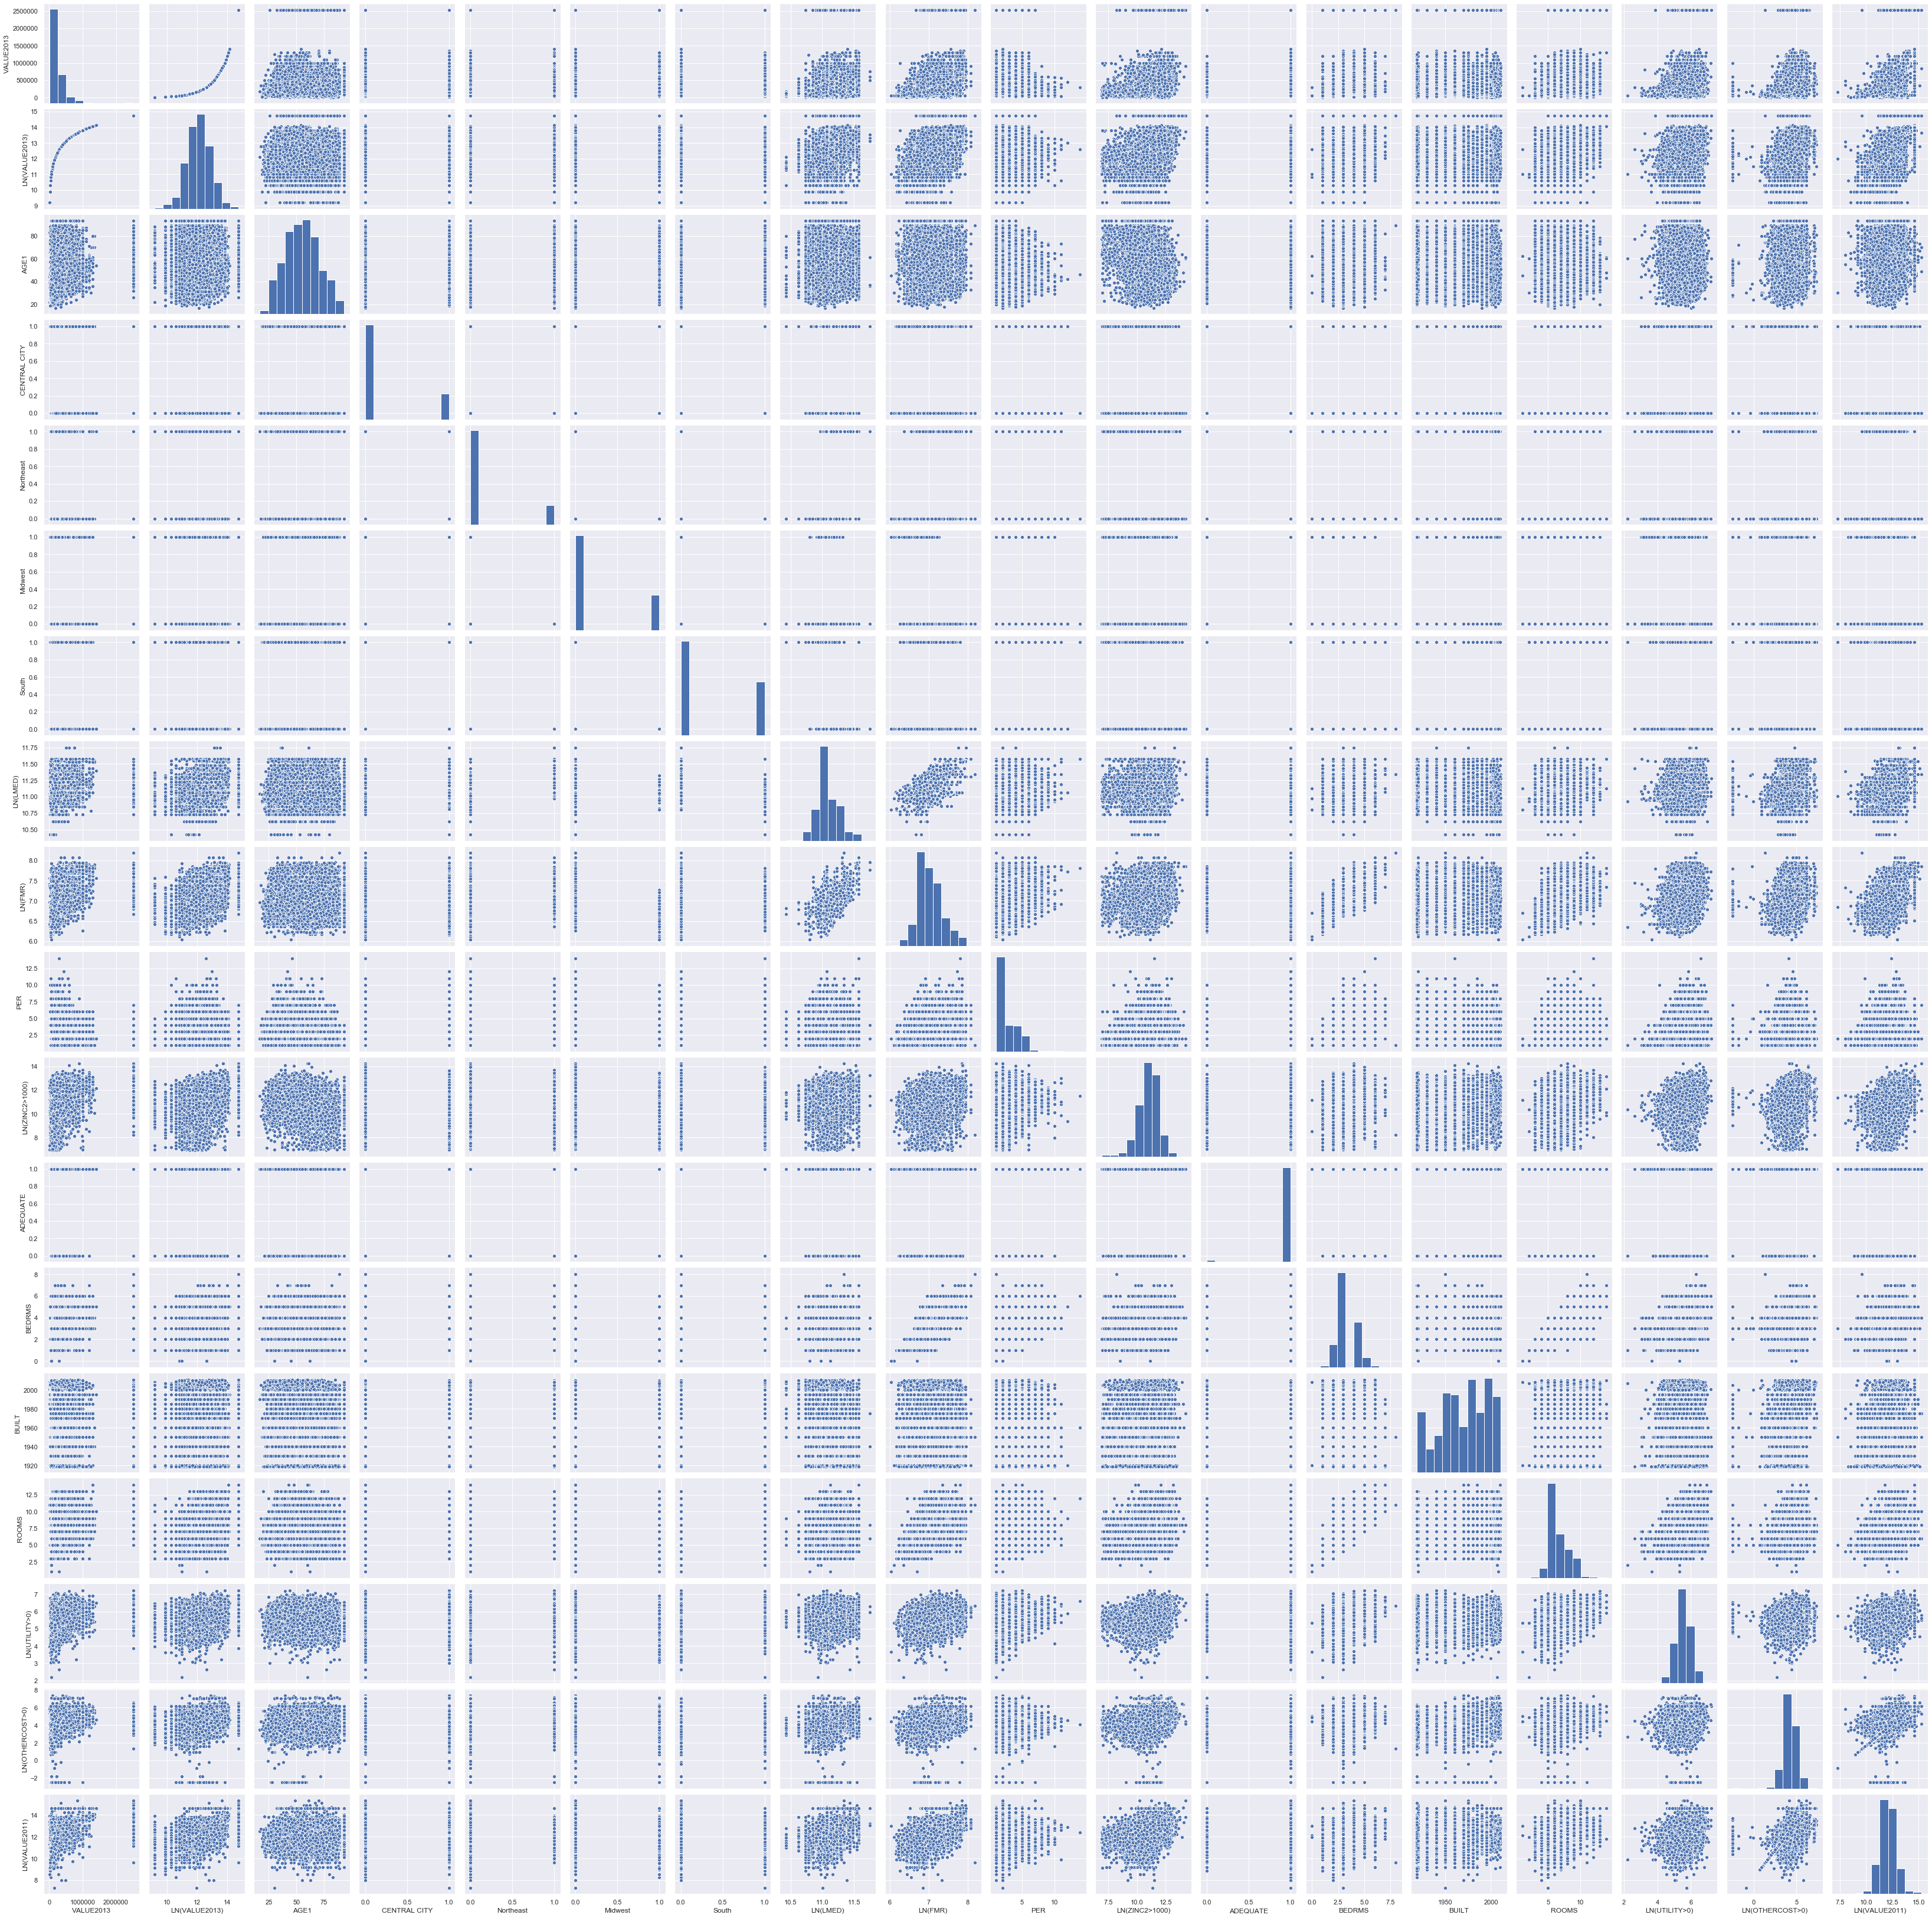

In [146]:
sns.set()
cols = ['VALUE2013', 'LN(VALUE2013)', 'AGE1', 'CENTRAL CITY', 'Northeast',
       'Midwest', 'South', 'LN(LMED)', 'LN(FMR)', 'PER', 'LN(ZINC2>1000)',
       ,'BEDRMS', 'BUILT', 'ROOMS', 'LN(UTILITY>0)','LN(VALUE2011)']
sns.pairplot(df[cols],height = 2.5)

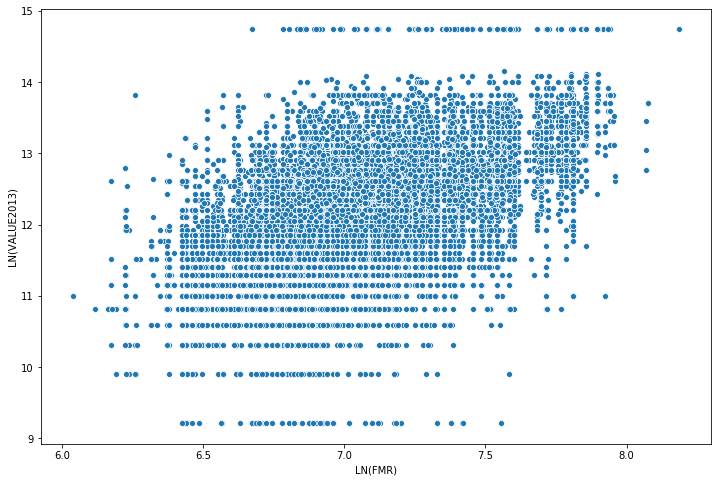

In [34]:
# Area Median income VS market value
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'LN(FMR)', y ='LN(VALUE2013)',data = df )

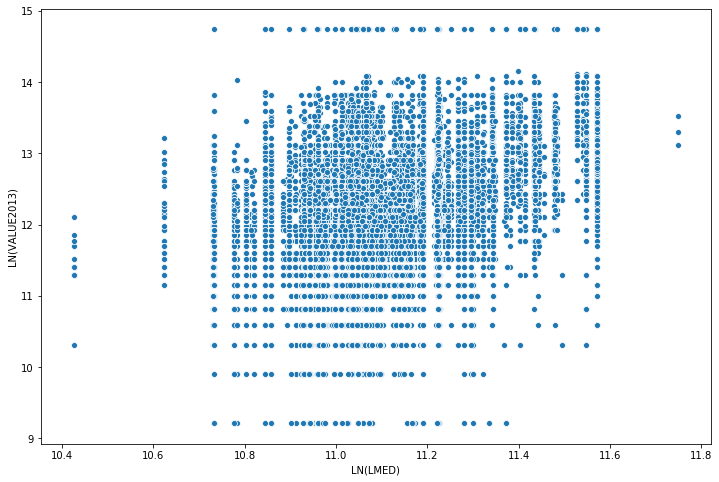

In [35]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'LN(LMED)', y ='LN(VALUE2013)',data = df )

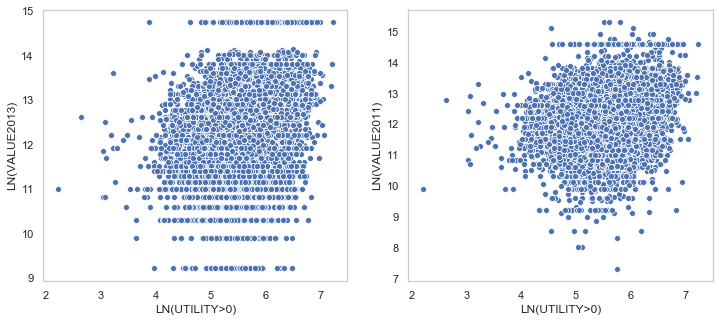

In [237]:
# other cost VS market value ( 2011, 2013)
fig, axes = plt.subplots(1,2, figsize =(12,5))
sns.scatterplot(x = 'LN(UTILITY>0)', y='LN(VALUE2013)',data = df, ax = axes[0])
sns.scatterplot(x = 'LN(UTILITY>0)', y='LN(VALUE2011)',data = df, ax = axes[1])

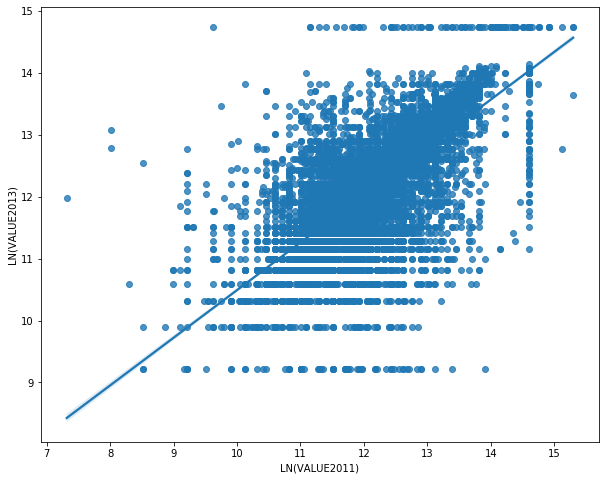

In [33]:
#market value(2011 and 2013)
plt.figure(figsize = (10,8))
sns.regplot(x = 'LN(VALUE2011)', y='LN(VALUE2013)',data = df)

In [39]:
# create training and testing vars
df_y = df['LN(VALUE2013)']
df_x = df[['AGE1', 'CENTRAL CITY', 'Northeast',
       'Midwest', 'South', 'LN(LMED)', 'LN(FMR)', 'PER', 'LN(ZINC2>1000)',
       'BEDRMS', 'BUILT', 'ROOMS', 'LN(UTILITY>0)', 'LN(VALUE2011)']]
X_train, X_test, y_train, y_test = train_test_split(df_x,df_y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(15784, 14) (15784,)
(3946, 14) (3946,)


In [40]:
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
reg.coef_

array([ 0.00084051, -0.05334341, -0.06629013, -0.10623386, -0.11214789,
        0.1597382 ,  0.37502567, -0.01338698,  0.06661236, -0.03083559,
        0.00204888,  0.04457423,  0.04811818,  0.57049851])

In [42]:
reg.intercept_

-4.349340651114181

In [43]:
predictions = reg.predict(X_test)

Text(9, 14.8, 'R^2 = 0.60')

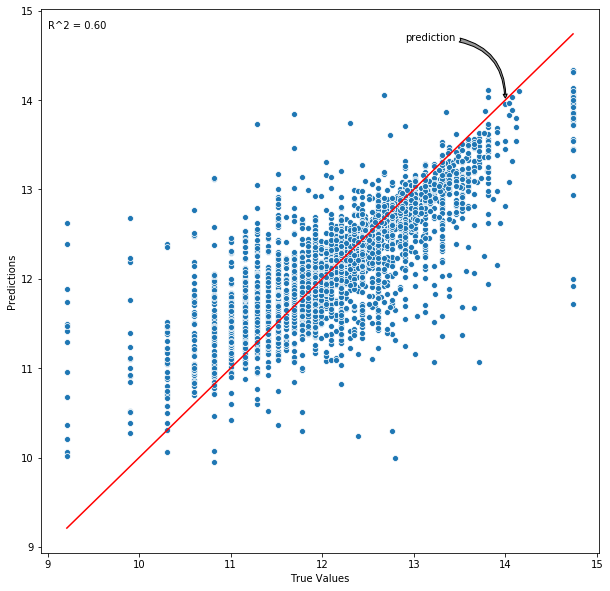

In [44]:
# plt.ion()
plt.figure(figsize=(10,10))
sns.scatterplot(y_test, predictions)
p1 = max(max(predictions),max(y_test))
p2 = min(min(predictions),min(y_test))
plt.plot([p1,p2], [p1,p2],'r-')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.annotate('prediction',xy=(14,14),xycoords='data',
            xytext=(-100,60), textcoords='offset points',
            arrowprops=dict(arrowstyle='fancy',fc='0.6',
                            connectionstyle="angle3,angleA=0,angleB=-90"))
plt.annotate('R^2 = 0.60', xy=(9, 14.8))

In [45]:
# The cofficient R^2 
reg.score(X_test, y_test)

0.6172031581124775

In [46]:
x2 = sm.add_constant(X_train)
model = sm.OLS(y_train,x2)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          LN(VALUE2013)   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     1685.
Date:                Mon, 21 Dec 2020   Prob (F-statistic):               0.00
Time:                        14:51:15   Log-Likelihood:                -11171.
No. Observations:               15784   AIC:                         2.237e+04
Df Residuals:                   15769   BIC:                         2.249e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -4.3493      0.468     -9.